<a href="https://colab.research.google.com/github/AmbaliAnjane/DataScientist-Analyst_projects/blob/main/uci_census_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BUISNESS DISCRIPTION**: the data for case study comes  from  cansus income  dataset in uci machine learning repository.

**objctive:* ****  based on census data we have to say whether income of an individual exceeda 50k /per year or not..

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [64]:
dataset=pd.read_csv("/content/adult.csv")
testdf=pd.read_csv("/content/adult.test")

In [65]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [66]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [67]:
dataset.shape

(32561, 15)

In [68]:
testdf.isnull().sum()

25                    0
 Private              0
 226802               0
 11th                 0
 7                    0
 Never-married        0
 Machine-op-inspct    0
 Own-child            0
 Black                0
 Male                 0
 0                    0
 0.1                  0
 40                   0
 United-States        0
 <=50K.               0
dtype: int64

1>dataset has no missing values.looking for mismatched datatype if  any

In [69]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [70]:
#census data eda
dataset['income_above_50K']=dataset['income'].map({'<=50K':0, '>50K':1})
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_above_50K
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


encoding:we have converte dataset income attribute from obj to int
slary <=50k :0,/>50k=1

Text(0.5, 1.0, 'Age by Passenger maritalstatus')

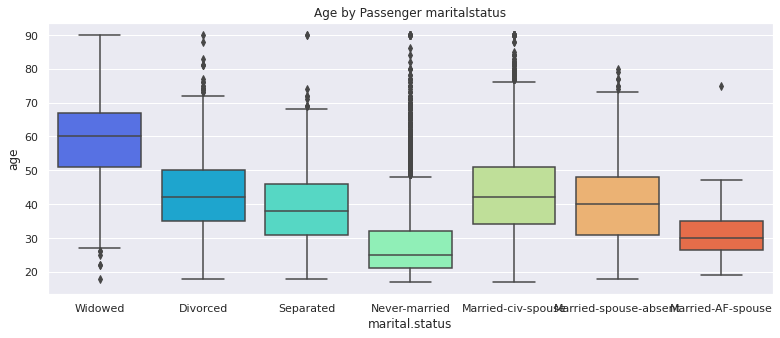

In [71]:
plt.figure(figsize=(13,5))
sns.boxplot(x='marital.status',y='age',data=dataset, palette='rainbow')
plt.title("Age by Passenger maritalstatus")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


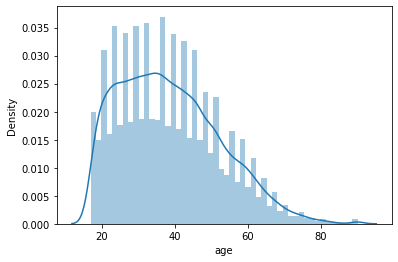

In [ ]:
sns.distplot(dataset['age'],kde=True) #univariat analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


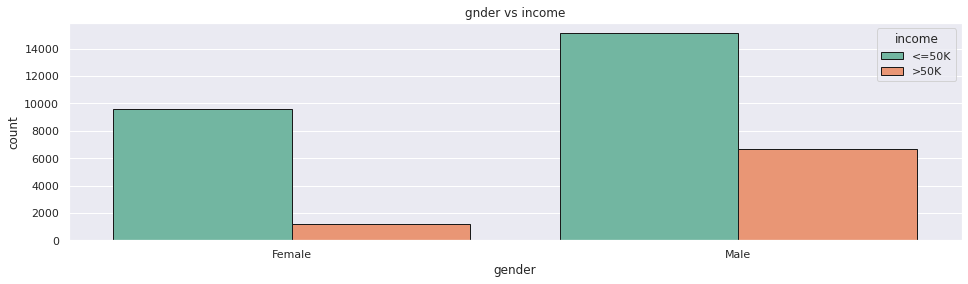

In [72]:
ax=sns.countplot(dataset['sex'],hue=dataset['income'],edgecolor='k',palette='Set2')
ax.set_title('gnder vs income')
ax.set_xlabel('gender')
plt.show()


we have observed num of females earning more than 50l is very less as compare to num of males ,also less than 50k category females are less as compared to male part
it implies less no of womans participation
because in both category womens are less in number ,,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Marital Status')

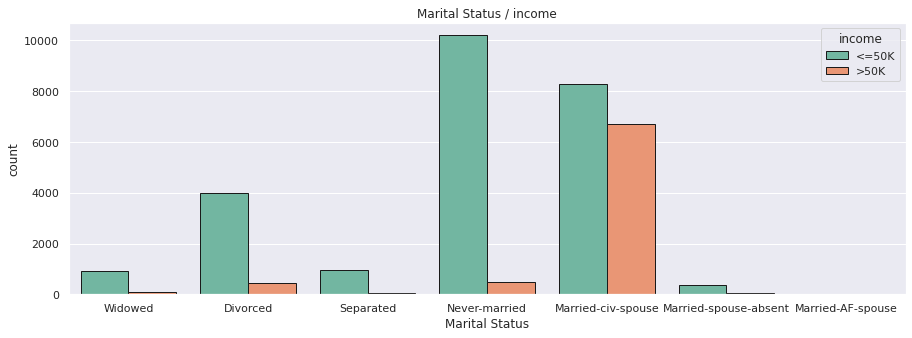

In [73]:
plt.figure(figsize=(15,5))
ax=sns.countplot(dataset['marital.status'], hue=dataset['income'],edgecolor='k',palette='Set2')
ax.set_title('Marital Status / income')
ax.set_xlabel('Marital Status')


insights:most of the peoples who are earning more than 50k are married,very few are divorced and widowed or never married...
most of the people earning less than 50k are never married..at time of data recorded ..may be in future they get married

In [74]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
categorical_features=[feature for feature in  dataset.columns if  dataset[feature].dtype=='O' and feature!='income' ]
print("categorical_features are")
print(categorical_features)
print('\n')
print("numerical features are")
print(numerical_features)

categorical_features are
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


numerical features are
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income_above_50K']


In [75]:
dataset.dtypes


age                  int64
workclass           object
fnlwgt               int64
education           object
education.num        int64
marital.status      object
occupation          object
relationship        object
race                object
sex                 object
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country      object
income              object
income_above_50K     int64
dtype: object

In [76]:
dataset['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


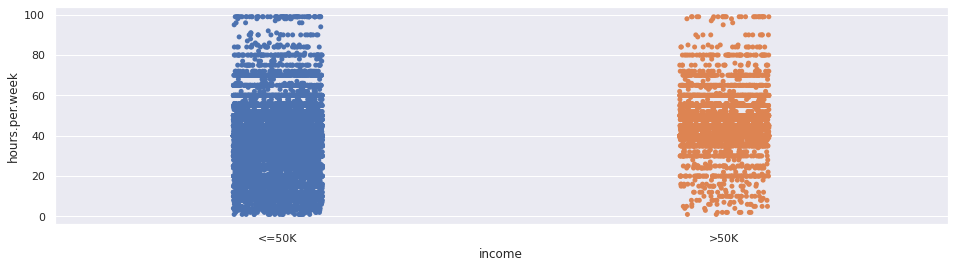

In [77]:
ax = sns.stripplot(dataset['income'], dataset['hours.per.week'])

 working hours of persons earining more than 50k is more concentrated from 30 to 50 hours per week more than 4 to 5 hours a day those who are earning more also work from this time span somepeple works less and some more also...

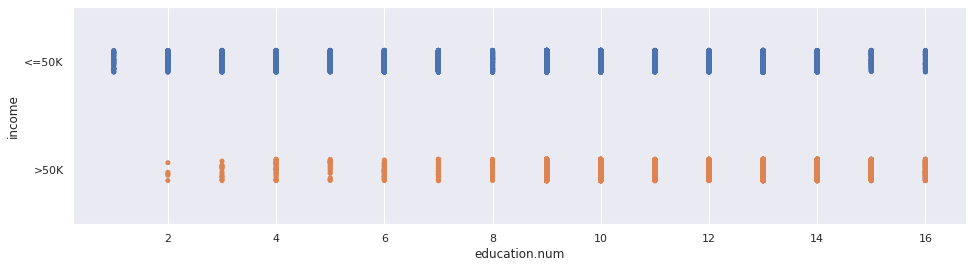

In [78]:
ax = sns.stripplot(x=dataset['education.num'], y=dataset['income'], data=dataset)
  

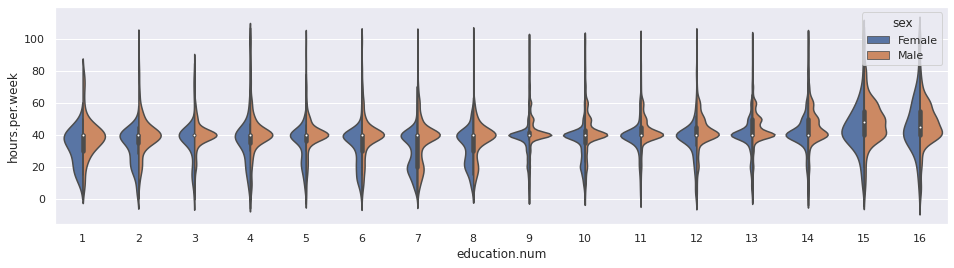

In [79]:
sns.violinplot(x='education.num', y='hours.per.week', data=dataset,
               hue='sex', split=True)

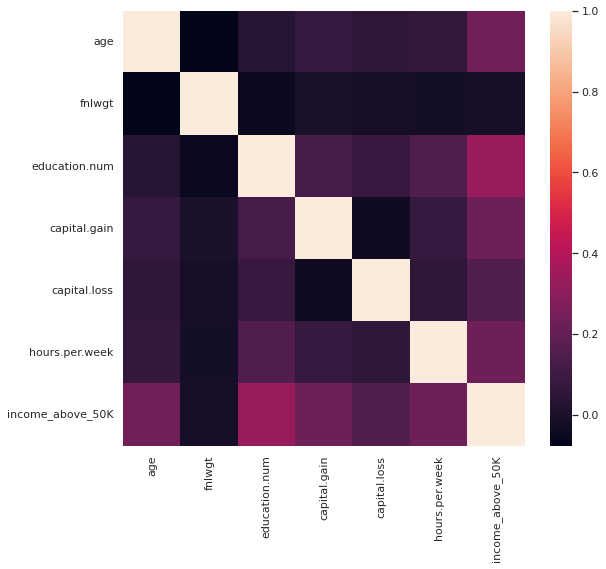

In [80]:
corr = dataset.corr()
 
# Heatmapstats_df
plt.figure(figsize=(9,8))
sns.heatmap(corr)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


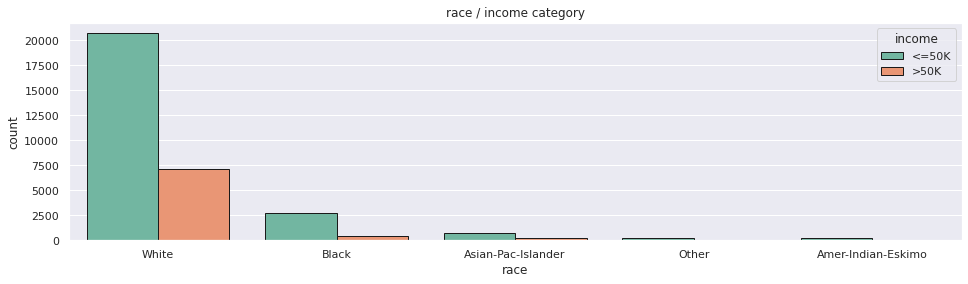

In [81]:
ax=sns.countplot(dataset['race'], hue=dataset['income'],edgecolor='k',palette='Set2')
ax.set_title('race / income category')
ax.set_xlabel('race')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


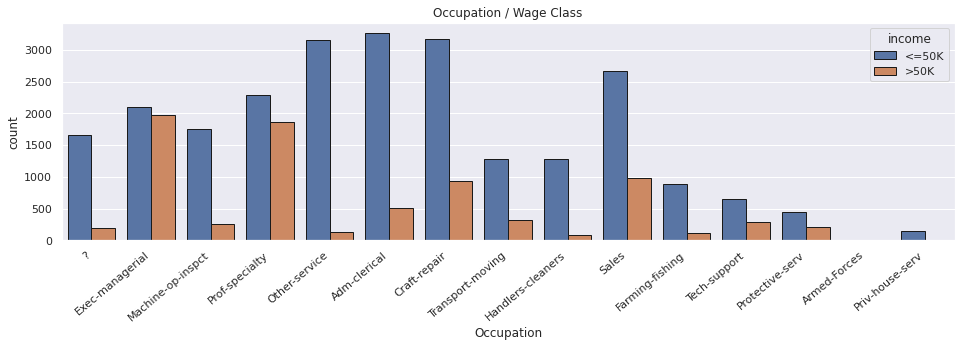

In [ ]:
ax=sns.countplot(dataset['occupation'], hue=dataset['income'],edgecolor='k')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Occupation / Wage Class')
ax.set_xlabel('Occupation')
plt.show()

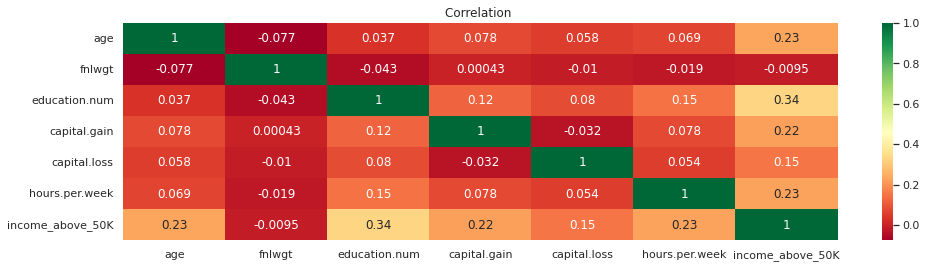

In [82]:
corr=dataset.copy()
for feature in categorical_features:
    corr.drop(feature,axis=1,inplace=True)

    
ax=sns.heatmap(corr.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation ')
plt.show()

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education.num     32561 non-null  int64 
 5   marital.status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital.gain      32561 non-null  int64 
 11  capital.loss      32561 non-null  int64 
 12  hours.per.week    32561 non-null  int64 
 13  native.country    32561 non-null  object
 14  income            32561 non-null  object
 15  income_above_50K  32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [84]:
X = dataset.drop(['income'], axis=1)

y = dataset['income']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
#categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
from sklearn import preprocessing
for feature in categorical_features:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [89]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['income']=encoder.fit_transform(dataset['income'])

in the dataset some of the columns seems irrelevent we are using pca dimensionality reduction techinques here to only have those columns which are rellevent..

In [90]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([9.95040699e-01, 4.94461926e-03, 1.46422651e-05, 1.65524548e-08,
       1.32317053e-08, 5.42842518e-09, 1.59190751e-09, 1.41187641e-09,
       4.46935570e-10, 2.16361693e-10, 1.73697886e-10, 1.67316281e-10,
       6.17985627e-11, 1.33385993e-11, 1.09219705e-11])

In [92]:
# can see easily relevence of last features is very less it is 10*-11 
#i will drop this irrelevent colulmn to improve accuracy of model
X =dataset.drop(['income','native.country'], axis=1)
y = dataset['income']


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [97]:
categorical_features=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
from sklearn import preprocessing
for feature in categorical_features:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [122]:
 import xgboost as xgb
from sklearn.model_selection import cross_val_score
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xgb_classifier.predict(X_test)


score_xgb=cross_val_score(xgb_classifier, X_train, y_train, cv=5, n_jobs=-1)


In [123]:
#building confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[4966    0]
 [   0 1547]]


In [124]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)


1.0


here we are getting 100 percent accuracy of the model

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
score_rf=cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)

In [128]:
#building cm
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[4966    0]
 [   0 1547]]


In [129]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_pred,y_test)
print(ac)

1.0


In [137]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
score_svc=cross_val_score(svc, X_train, y_train, cv=5, n_jobs=-1)
cm2=confusion_matrix(y_pred,y_test)
ac=accuracy_score(y_pred,y_test)
print(ac)
print(cm)

0.8005527406725012
[[4795 1124]
 [ 171  423]]


In [140]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_pred,y_test)
from sklearn.metrics import accuracy_score
ac3=accuracy_score(y_pred,y_test)
print(cm3)
print(ac3)

[[4959 1292]
 [   7  255]]
0.8005527406725012


In [141]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
logReg.fit(X_train,y_train)
y_pred=logReg.predict(X_test)
score_logReg=cross_val_score(logReg, X_train, y_train, cv=5, n_jobs=-1)
cm4=confusion_matrix(y_pred,y_test)
ac4=accuracy_score(y_pred,y_test)
print(cm4)
print(ac4)

[[4795 1124]
 [ 171  423]]
0.8011668969752802


In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
score_knn=cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1)
cm5=confusion_matrix(y_pred,y_test)
ac5=accuracy_score(y_pred,y_test)
print(cm5)
print(ac5)

[[4541 1036]
 [ 425  511]]
0.7756794104099494


In [144]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()
adaboost.fit(X_train,y_train)
y_pred=adaboost.predict(X_test)
score_adaboost=cross_val_score(adaboost, X_train, y_train, cv=5, n_jobs=-1)
ac6=accuracy_score(y_test,y_pred)
cm6=confusion_matrix(y_pred,y_test)
print(ac6)
print(cm6)

1.0
[[4966    0]
 [   0 1547]]


In [119]:
y_train

15282    0
24870    0
18822    0
26404    0
7842     0
        ..
13123    0
19648    0
9845     0
10799    1
2732     1
Name: income, Length: 26048, dtype: int64

In [113]:
scores=pd.DataFrame({'Model':['XGBoost','Random Forest','SVC','Logistic Regression','KNN','Adaboost'],
                    'Accuracy':[score_xgb.mean(),score_rf.mean(),score_svc.mean(),score_logReg.mean(),score_knn.mean(),
                             score_adaboost.mean()]})

In [114]:
print(scores)

                 Model  Accuracy
0              XGBoost  1.000000
1        Random Forest  1.000000
2                  SVC  0.791462
3  Logistic Regression  0.793689
4                  KNN  0.773111
5             Adaboost  1.000000


we get very good accuracy with xgboost,random forest and adaboost as all boosting algorithems does not requires feature scalling it is good to go without feature scaling 
for this algorithems
but for remaining algorithems not performing well as we have not done feature scaling....


In [ ]:
X_train=final_train.drop('wage_class',axis=1)
y_train=final_train['wage_class']

X_test=final_test.drop('wage_class',axis=1)
y_test=final_test['wage_class']